In [6]:
import statsmodels.api as sm 
import pandas as pd  
import source.utils as ut
import matplotlib.pyplot as plt

In [2]:
df = ut.get_dataFrame_withShortCols()
cleanedDF = ut.data_cleaner(df)
ytrain = cleanedDF['Default indicator']
Xtrain = cleanedDF[['Number of applicants',
       'Loan purpose', 'Application amount', 'Credit duration',
       'Payment frequency', 'Installment amount', 'Value of the goods',
       'income of main applicant', 'income of second applicant',
       'profession of main applicant', 'profession of second applicant',
       'marital status of main applicant',
       'number of children of main applicant',
       'number of dependences of main applicant', 'Spendings estimation',
       'Property ownership for property renovation',
       'Clasification of the vehicle',
       'Number of requests during the last 3 months',
       'Number of requests during the last 6 months',
       'Number of requests during the last 9 months',
       'Number of requests during the last 12 months', 'Limit on credit card',
       'Amount on current account', 'Amount on savings account',
       'Arrear in last 3 months', 'Arrear in last 12 months',
       'Credit bureau score', 'Average income']]

log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.122769
         Iterations 8


In [3]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:      Default indicator   No. Observations:                35700
Model:                          Logit   Df Residuals:                    35672
Method:                           MLE   Df Model:                           27
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.1081
Time:                        23:12:06   Log-Likelihood:                -4382.8
converged:                       True   LL-Null:                       -4914.1
Covariance Type:            nonrobust   LLR p-value:                1.264e-206
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Number of applicants                            -0.5570      0.116     -4.784      0.000      -0.785      -0.329
Loan purpose                 

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
  
yhat = log_reg.predict(Xtrain) 
prediction = list(map(round, yhat)) 
# confusion matrix 
cm = confusion_matrix(ytrain, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytrain, prediction))

Confusion Matrix : 
 [[34566    33]
 [ 1033    68]]
Test accuracy =  0.9701400560224089


Text(0, 0.5, 'True Positive Rate')

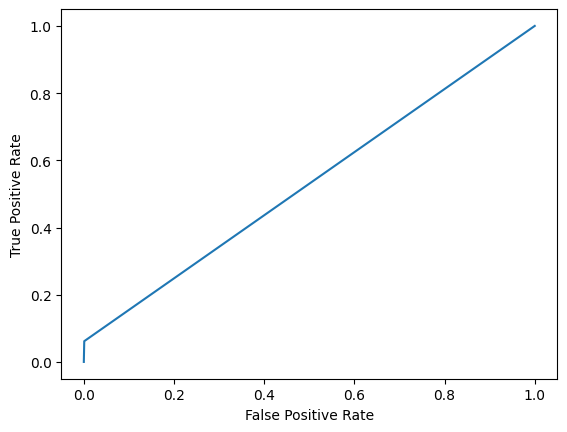

In [9]:
fpr, tpr, thresholds = roc_curve(ytrain, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [10]:
df

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,31Dec2020 0:00:00,1.0,Approved,2,1.0,1,49200,111,...,2,2,0,NaN,NaN,0,0,0,12832,0.783954
49996,11084973,32884069,31Dec2020 0:00:00,NaN,Rejected,1,2.0,1,25600,30,...,3,4,0,NaN,NaN,0,0,0,12832,0.172590
49997,11084974,32433438,31Dec2020 0:00:00,0.0,Approved,1,1.0,1,46700,18,...,0,0,0,9288.87,255018.31,0,0,0,12832,0.060722
49998,11084975,32877592,31Dec2020 0:00:00,NaN,Rejected,1,1.0,4,44300,162,...,3,3,102000,NaN,NaN,0,0,10,12832,0.845866
